<a href="https://colab.research.google.com/github/cliffordsepato/tweet-sentiment-analysis-nft/blob/main/Tweet_sentiment_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving api_keys.py to api_keys.py


In [4]:
api_keys = "api_keys.py"

In [5]:
#import dependencties
from api_keys import consumer_key, consumer_secret

In [6]:
!pip install -q transformers tweepy wordcloud matplotlib

     |████████████████████████████████| 4.4 MB 5.5 MB/s 
     |████████████████████████████████| 101 kB 9.7 MB/s 
     |████████████████████████████████| 596 kB 49.8 MB/s 
     |████████████████████████████████| 6.6 MB 33.3 MB/s 


In [10]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=e924a48fcf99008a09b2fe5ecc7f8ee1f578928e3395b67e2f8e82b9605d4728
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [7]:
import tweepy

# Add Twitter API key and secret
consumer_key = consumer_key
consumer_secret = consumer_secret

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break

# Define the term we will be using for searching tweets
query = '#NFTs'
query = query + ' -filter:retweets'

# Define how many tweets to get from the Twitter API 
count = 1000

# Let's search for tweets using Tweepy 
search = limit_handled(tweepy.Cursor(api.search,
                        q=query,
                        tweet_mode='extended',
                        lang='en',
                        result_type="recent").items(count))

In [11]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in search:
    try: 
      content = tweet.full_text
      sentiment = sentiment_analysis(content)
      tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})

    except: 
      pass

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (130 > 128). Running this sequence through the model will result in indexing errors


In [13]:
import pandas as pd

# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000) 
df = pd.DataFrame(tweets)

# Show a tweet for each sentiment 
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

,tweet,sentiment
1,A unique collection of plasticine modeling..\n@OpenSea\n\n#NFTs #NFT #NFTCollection #nftcollectors #NFTMarketplace #nftcommunity #NFTdrop #NFTdrops #nftcollector #NFTCollection #cryptopunks #nftgallery #opensea #OpenSeaNFT #nftsale #nftart #nftnews https://t.co/MakyNAErzR https://t.co/GFqPrvPuqL,POS


,tweet,sentiment
0,Go to church 🛐\n#TheBoysFinale #NFTGiveaway #NFTFam #NFTartists #NFTs #sundayvibes #Gotochurch https://t.co/QxiGZRCPdf,NEU


,tweet,sentiment
41,WICKEDMFERS #Creyzies #40\n😱 😱 The last one 😱 😱\n\n🤪Only 25 of these D🤬P€ #mfers were minted \n\n🤟And come with #Airdrop in Slot 3 \n\nBrokenSea👇\nhttps://t.co/8ixWSh1G0r\n\n#mfers #NFTCommunity @reylarsdam #NFTs #NFTdrop #WickedMfers https://t.co/HaOWoXVeFD,NEG


sentiment
NEG     34
NEU    440
POS    525
dtype: int64


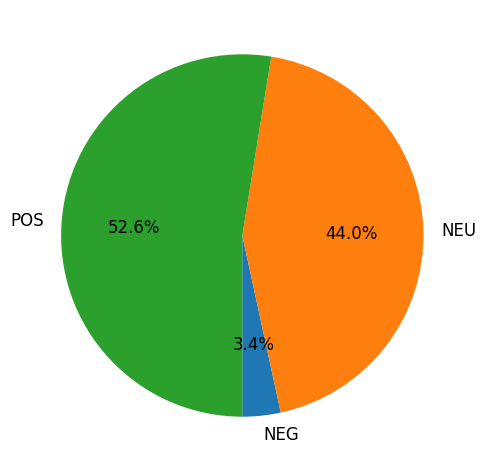

In [14]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)


# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

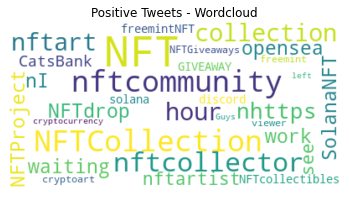

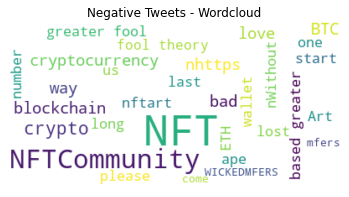

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

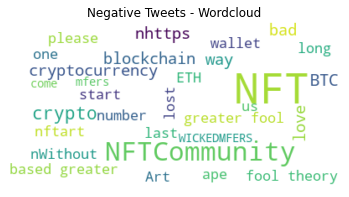

In [17]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()